# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "../cities.csv"

output_data_file = pd.read_csv("../python-api-challenge/cities.csv")
#Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

output_data_file

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tiksi,100,RU,1622605094,81,71.6872,128.8694,38.79,5.79
1,Seoul,0,KR,1622605094,43,37.5683,126.9778,83.71,5.79
2,Yellowknife,75,CA,1622605094,100,62.4560,-114.3525,55.92,6.91
3,Punta Arenas,75,CL,1622604922,86,-53.1500,-70.9167,21.31,1.54
4,Cidreira,100,BR,1622605095,72,-30.1811,-50.2056,58.50,4.61
...,...,...,...,...,...,...,...,...,...
558,Bonfim,88,BR,1622605253,93,3.0833,-59.9500,74.66,4.41
559,Kalabo,82,ZM,1622605253,46,-14.9700,22.6814,52.52,6.60
560,Saint-Augustin,73,CA,1622605054,86,51.2260,-58.6502,50.94,8.19
561,Salinas,90,US,1622605253,80,36.6777,-121.6555,69.57,12.66


## Generate Cities List

In [52]:
# List for holding lat_lngs and cities
lat_lngs = []

cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [53]:
# Calling URL and Units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#api.openweathermap.org/data/2.5/weather?zip={zip code},{country code}&appid={weather_api_key}

# Build weather url
weather_url = f"{url}appid={weather_api_key}&units={units}&q="


#List variables
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#count for city number
count = 1

print(f"Beginning Data Retrieval")   
print("---------------------")

# Loop through the list of cities, request for data on each, make dict titles
for city in cities:
    try:
        response = requests.get(weather_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        
        print(f"Processing Record {count} | {city}") 
        
        count += 1
        
        weather_df = {"City": city_name,
            "Cloudiness":cloudiness, 
            "Country":country,
            "Date":date, 
            "Humidity": humidity,
            "Lat":lat, 
            "Lng":lng, 
            "Max Temp": max_temp,
            "Wind Speed":wind_speed
}

    except:
        print(f"City not found. Next...")
        continue
print("---------------------")
print(f"Data Complete")   
print("---------------------")

Beginning Data Retrieval
---------------------
Processing Record 1 | new norfolk
Processing Record 2 | severo-kurilsk
Processing Record 3 | najran
Processing Record 4 | eidsvag
City not found. Next...
Processing Record 5 | mattru
Processing Record 6 | bozuyuk
Processing Record 7 | waterloo
Processing Record 8 | atuona
Processing Record 9 | san patricio
Processing Record 10 | rikitea
Processing Record 11 | khatanga
Processing Record 12 | hamilton
Processing Record 13 | fare
Processing Record 14 | blagoyevo
Processing Record 15 | cabo san lucas
Processing Record 16 | qaqortoq
Processing Record 17 | hilo
Processing Record 18 | ancud
Processing Record 19 | kodiak
Processing Record 20 | puerto ayora
Processing Record 21 | ranfurly
City not found. Next...
Processing Record 22 | georgetown
Processing Record 23 | torbay
Processing Record 24 | salalah
Processing Record 25 | bandon
Processing Record 26 | marandahalli
Processing Record 27 | cape town
Processing Record 28 | norman wells
Processing

Processing Record 235 | rio grande
Processing Record 236 | aguas vermelhas
Processing Record 237 | rauma
City not found. Next...
Processing Record 238 | prince albert
Processing Record 239 | dhidhdhoo
Processing Record 240 | dunedin
Processing Record 241 | acapulco
Processing Record 242 | clyde river
Processing Record 243 | oshnaviyeh
Processing Record 244 | nova olimpia
Processing Record 245 | benghazi
Processing Record 246 | port blair
Processing Record 247 | karratha
Processing Record 248 | jizan
Processing Record 249 | ukiah
Processing Record 250 | chornobay
Processing Record 251 | santa rosa
City not found. Next...
Processing Record 252 | vila velha
Processing Record 253 | izumo
Processing Record 254 | belaya gora
Processing Record 255 | aswan
Processing Record 256 | pinega
Processing Record 257 | paamiut
City not found. Next...
Processing Record 258 | vila franca do campo
Processing Record 259 | plettenberg bay
Processing Record 260 | mangrol
Processing Record 261 | marfino
Proce

Processing Record 467 | kiama
Processing Record 468 | spearfish
Processing Record 469 | monywa
Processing Record 470 | buraydah
Processing Record 471 | lazurne
Processing Record 472 | busteni
Processing Record 473 | mosquera
Processing Record 474 | revelstoke
Processing Record 475 | vardo
Processing Record 476 | porechye-rybnoye
City not found. Next...
Processing Record 477 | launceston
Processing Record 478 | boa vista
City not found. Next...
Processing Record 479 | meulaboh
Processing Record 480 | kamenka
Processing Record 481 | quzhou
Processing Record 482 | curumani
City not found. Next...
Processing Record 483 | hanson
City not found. Next...
Processing Record 484 | lac du bonnet
Processing Record 485 | davidson
Processing Record 486 | broken hill
Processing Record 487 | norrtalje
Processing Record 488 | klyuchi
Processing Record 489 | manono
Processing Record 490 | anjar
Processing Record 491 | los negros
Processing Record 492 | kargasok
Processing Record 493 | paslek
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [58]:
#creating a DataFrame 
cities_data = pd.DataFrame(weather_df)

#pulling counts
cities_data.count()

City          568
Cloudiness    568
Country       568
Date          568
Humidity      568
Lat           568
Lng           568
Max Temp      568
Wind Speed    568
dtype: int64

In [56]:

#export the city data into a .csv.
cities_data.to_csv("../python-api-challenge/cities.csv", index = False)

# display header of DF
cities_data.head()



,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,New Norfolk,100,AU,1622616337,59,-42.7826,147.0587,57.58,3.36
1,Severo-Kuril'sk,47,RU,1622616337,81,50.6789,156.1250,42.44,2.71
2,Najrān,46,SA,1622616337,13,17.4924,44.1277,90.25,13.51
3,Eidsvåg,23,NO,1622616338,44,62.7767,8.0668,61.45,3.29
4,Mattru,89,SL,1622616338,93,7.6244,-11.8332,74.28,1.10


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [57]:
#pulling/finding cities with humidity greater or equal to 100
#Get the indices of cities that have humidity over 100%.
humid_data = cities_data[cities_data.Humidity >= 100]
#humid_data = cities_data[cities_data['Humidity'] == ">100"]
#df= df[df.index < 13492] 
#cities_data.drop[humid_data]

humid_data



,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
39,Ushuaia,90,AR,1622616348,100,-54.8000,-68.3000,29.86,10.36
69,Coquimbo,90,CL,1622616265,100,-29.9533,-71.3436,53.33,2.44
70,Lompoc,90,US,1622616358,100,34.6391,-120.4579,59.11,3.36
167,Aklavik,100,CA,1622616388,100,68.2191,-135.0107,31.03,5.50
169,Yellowknife,75,CA,1622616305,100,62.4560,-114.3525,52.32,4.61
218,Ketchikan,90,US,1622616192,100,55.3422,-131.6461,54.07,5.75
340,Nuuk,90,GL,1622616440,100,64.1835,-51.7216,34.41,4.61
363,Havre-St-Pierre,75,CA,1622616448,100,50.2334,-63.5986,43.16,3.44
472,Mosquera,75,CO,1622616481,100,4.7059,-74.2302,53.69,2.30
557,Alofi,79,NU,1622616509,100,-19.0595,-169.9187,69.69,9.22


In [48]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#dropping rows with humidity greater or equal to 100
cities_data.drop([53, 129, 133, 235, 246,273, 293, 357, 498],axis=0,inplace=True)
cities_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tiksi,100,RU,1622605094,81,71.6872,128.8694,38.79,5.79
1,Seoul,0,KR,1622605094,43,37.5683,126.9778,83.71,5.79
3,Punta Arenas,75,CL,1622604922,86,-53.1500,-70.9167,21.31,1.54
4,Cidreira,100,BR,1622605095,72,-30.1811,-50.2056,58.50,4.61
5,Pisco,73,PE,1622605095,82,-13.7000,-76.2167,62.65,4.61


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

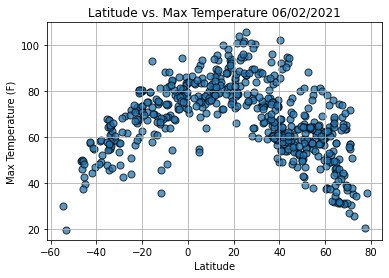

In [69]:
date = datetime.date.today().strftime("%m/%d/%Y")

plt.scatter(cities_data["Lat"], cities_data["Max Temp"], marker="o",s=50,alpha=.75, edgecolors="black")
plt.title(f"Latitude vs. Max Temperature {date}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("Latitude vs Max Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

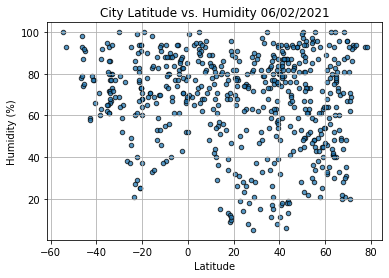

In [66]:
plt.scatter(cities_data["Lat"], cities_data["Humidity"], marker="o", s=50,alpha=.75, edgecolors="black")
plt.title(f"Latitude vs. Humidity {date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude vs Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

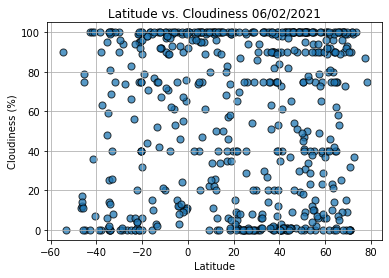

In [67]:
plt.scatter(cities_data["Lat"], cities_data["Cloudiness"], marker="o", s=50,alpha=.75, edgecolors="black")
plt.title(f"Latitude vs. Cloudiness {date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude vs Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

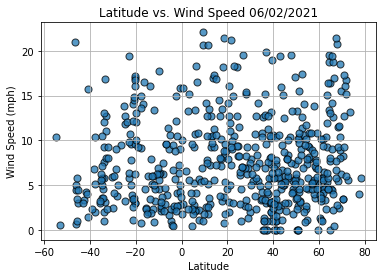

In [68]:
plt.scatter(cities_data["Lat"], cities_data["Wind Speed"], marker="o", s=50,alpha=.75, edgecolors="black")
plt.title(f"Latitude vs. Wind Speed {date}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude vs Wind Speed.png")
plt.show()

## Linear Regression

In [78]:
#creating variables for north and south hemisphere

#north_hem = cities_data[cities_data(["Lat"] >= 0.0,axis=0,inplace=True)]
north_hem = cities_data[cities_data["Lat"] >= 0.0]
north_hem.reset_index(inplace=True)

south_hem = cities_data[cities_data["Lat"] < 0.0]
south_hem.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7002420464660782


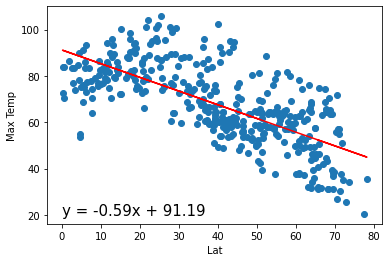

In [95]:
def pltlinregress(x, y, xlabel, ylabel, labelposition):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    print(f"The r-squared is: {rvalue}")
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,labelposition,fontsize=15,color="black")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

xlabel = "Lat"
ylabel = "Max Temp"
pltlinregress(north_hem[xlabel],north_hem[ylabel],xlabel,ylabel,labelposition)

#plt.linregress

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7425757785456076


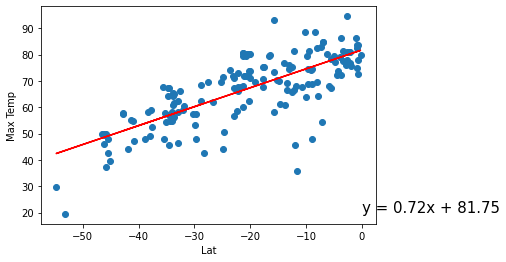

In [96]:
xlabel = "Lat"
ylabel = "Max Temp"
pltlinregress(south_hem[xlabel],south_hem[ylabel],xlabel,ylabel,labelposition)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.03662113613887266


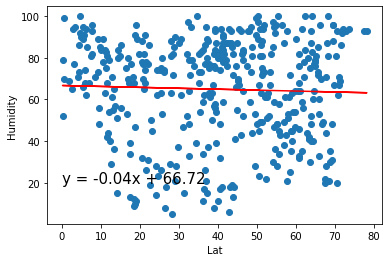

In [97]:
xlabel = "Lat"
ylabel = "Humidity"
pltlinregress(north_hem[xlabel],north_hem[ylabel],xlabel,ylabel,labelposition)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.0661232589389068


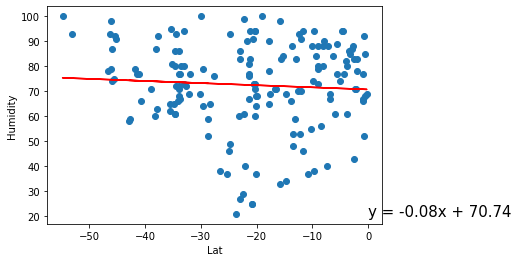

In [98]:
xlabel = "Lat"
ylabel = "Humidity"
pltlinregress(south_hem[xlabel],south_hem[ylabel],xlabel,ylabel,labelposition)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.022911822282026234


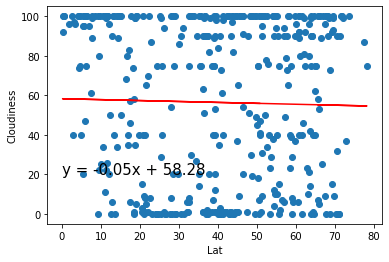

In [99]:
xlabel = "Lat"
ylabel = "Cloudiness"
pltlinregress(north_hem[xlabel],north_hem[ylabel],xlabel,ylabel,labelposition)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21903371321667184


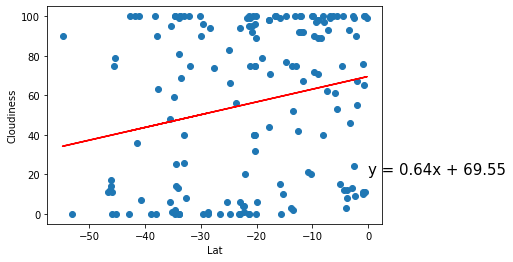

In [100]:
xlabel = "Lat"
ylabel = "Cloudiness"
pltlinregress(south_hem[xlabel],south_hem[ylabel],xlabel,ylabel,labelposition)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.012395492215291619


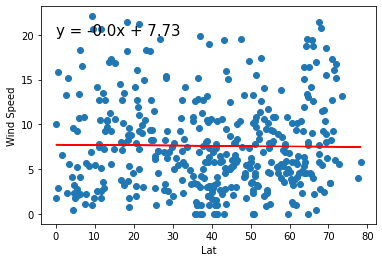

In [101]:
xlabel = "Lat"
ylabel = "Wind Speed"
pltlinregress(north_hem[xlabel],north_hem[ylabel],xlabel,ylabel,labelposition)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.001621951362961832


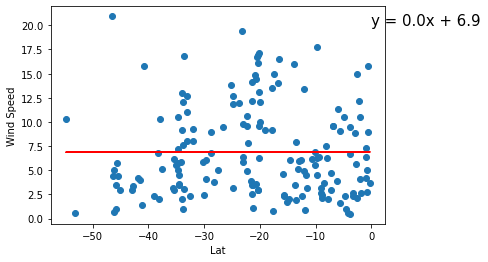

In [102]:
xlabel = "Lat"
ylabel = "Wind Speed"
pltlinregress(south_hem[xlabel],south_hem[ylabel],xlabel,ylabel,labelposition)